# Visualization Notebook

This is essentially a diffusion problem, and the partial differential equation that drives this phenomenon for a 2D problem is:

$$ Lap(T) = 0$$
$$or$$
$$\frac{\partial^2T}{\partial x^2} + \frac{\partial^2T}{\partial y^2} = 0$$ 

#### Imports

In [1]:
import torch.autograd as autograd

import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import numpy as np

In [2]:
from FCN import FCN
from tools import *

In [3]:
%matplotlib inline

#### Function tools

In [4]:
def partial_diff_equation(f, g):
    f_x_y = autograd.grad(f,g,torch.ones([g.shape[0], 1]), retain_graph=True, create_graph=True)[0] #first derivative
    f_xx_yy = autograd.grad(f_x_y,g,torch.ones(g.shape), create_graph=True)[0]#second derivative

    f_yy = f_xx_yy[:,[1]] # we select the 2nd element for y (the first one is x) (Remember the input X=[x,y]) 
    f_xx = f_xx_yy[:,[0]] # we select the 1st element for x (the second one is y) (Remember the input X=[x,y])

    u = f_xx + f_yy # loss equation
    u = u.float()

    return u

In [5]:
def pplot(u_pred,lossTensor, num_ticks = 11, mask = np.full((1500, 1500), False)):
    plt.close()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
    fig.tight_layout(pad = 5)

    num_ticks = 11
    # number of points in x and y
    nx = u_pred.shape[0]
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, nx)
    
    # the index of the position of yticks
    yticks = np.linspace(0, len(y) - 1, num_ticks, dtype=int)
    xticks = np.linspace(0, len(x) - 1, num_ticks, dtype=int)

    fmt = lambda x, pos: '{:.2f}'.format(x/nx, pos)

    plt.subplot(1,2,1)

    m = min([min(row) for row in u_pred])
    M = max([max(row) for row in u_pred])

    levels = np.arange(m, M, (1 / float(num_ticks)) * (M - m))
    CS = plt.contour(u_pred, colors="white", levels=levels)
    plt.clabel(CS, inline = 1, fontsize = 10)
    
    sns.heatmap(u_pred, 
                ax = ax1, 
                cmap = "rocket_r",
                cbar_kws={'label': r'$T^*$', 'shrink': 0.8},
                square = True,
                mask = mask)
    
    
    ax1.invert_yaxis()
    ax1.set_xticks(xticks)
    ax1.set_yticks(yticks)

    ax1.xaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    ax1.yaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    ax1.set(xlabel = r'$x^*$', ylabel = r'$y^*$')
    ax1.set_title('Temperature')

    minLoss = np.percentile(lossTensor, 5)
    maxLoss = np.percentile(lossTensor, 95)

    # rounds up value to the next multiple of 0.05
    value = ((max(abs(minLoss), abs(maxLoss)) + 0.049)//(0.05))*0.05

    plt.subplot(1,2,2)
    
    sns.heatmap(lossTensor,
                ax = ax2,
                vmin = -value,
                vmax = value,
                cmap = "vlag_r",
                cbar_kws={'label': r'$Loss$', 'shrink': 0.8},
                square = True,
                mask = mask)
    
    ax2.invert_yaxis()
    ax2.set_xticks(xticks)
    ax2.set_yticks(yticks)

    ax2.xaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    ax2.yaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    ax2.set(xlabel = r'$x^*$', ylabel = r'$y^*$')
    ax2.set_title('Loss')

    plt.show()

In [6]:
def pplot2(u_pred, lossTensor, X_train_PDE, X_train, loss_array, mask = np.full((1500, 1500), False), num_ticks = 11):
    plt.close()
    fig, axs = plt.subplots(2, 2, figsize = (12,12))
    fig.tight_layout(pad = 5)

    num_ticks = 11
    # number of points in x and y
    nx = u_pred.shape[0]
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, nx)

    # the index of the position of yticks
    yticks = np.linspace(0, len(y) - 1, num_ticks, dtype=int)
    xticks = np.linspace(0, len(x) - 1, num_ticks, dtype=int)

    fmt = lambda x, pos: '{:.2f}'.format(x/nx, pos)

    plt.subplot(2,2,1)

    m = min([min(row) for row in u_pred])
    M = max([max(row) for row in u_pred])

    levels = np.arange(m, M, (1 / float(num_ticks)) * (M - m))
    CS = plt.contour(u_pred, colors="white", levels=levels)
    plt.clabel(CS, inline = 1, fontsize = 10)

    sns.heatmap(u_pred, 
                ax = axs[0, 0], 
                cmap = "rocket_r",
                cbar_kws={'label': r'$T^*$', 'shrink': 0.8},
                square = True,
                mask = mask)
    
    axs[0, 0].invert_yaxis()
    axs[0, 0].set_xticks(xticks)
    axs[0, 0].set_yticks(yticks)

    axs[0, 0].xaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    axs[0, 0].yaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    axs[0, 0].set(xlabel = r'$x^*$', ylabel = r'$y^*$')
    axs[0, 0].set_title('Temperature')

    minLoss = np.percentile(lossTensor, 5)
    maxLoss = np.percentile(lossTensor, 95)

    # rounds up value to the next multiple of 0.05
    value = ((max(abs(minLoss), abs(maxLoss)) + 0.049)//(0.05))*0.05


    sns.heatmap(lossTensor,
                ax = axs[0, 1],
                vmin = -value,
                vmax = value,
                cmap = "vlag_r",
                cbar_kws={'label': r'$Loss$', 'shrink': 0.8},
                square = True,
                mask = mask)
    
    axs[0, 1].invert_yaxis()
    axs[0, 1].set_xticks(xticks)
    axs[0, 1].set_yticks(yticks)

    axs[0, 1].xaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    axs[0, 1].yaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmt))
    axs[0, 1].set(xlabel = r'$x^*$', ylabel = r'$y^*$')
    axs[0, 1].set_title('Loss')

    legend_handles = []


    sns.scatterplot(X_train_PDE, 
                    x = X_train_PDE[:, 0], 
                    y = X_train_PDE[:, 1], 
                    ax = axs[1, 0],
                    marker = ".",
                    color = 'deepskyblue', 
                    legend = False)
    
    sns.scatterplot(X_train, 
                    x = X_train[:, 0], 
                    y = X_train[:, 1], 
                    ax = axs[1, 0],
                    marker = "o",  
                    color = 'coral',
                    legend = False)
    legend_handles = [
        mlines.Line2D([], [], color= 'deepskyblue', marker= 'o',linestyle='None', label= 'PDE Sampling Points'),
        mlines.Line2D([], [], color= 'coral', marker= 'x',linestyle='None', label='BC Sampling Points')
    ]

    axs[1, 0].set(xlabel = r'$x^*$', ylabel = r'$y^*$')
    axs[1, 0].set_title('Sampling points for Neural Network')
    axs[1, 0].legend(handles = legend_handles)


    sns.lineplot(loss_array,
                ax = axs[1, 1])

    axs[1, 1].set(xlabel = r'$Iteration$', ylabel = r'$Loss$', yscale = 'log')
    axs[1, 1].legend(['Combined Loss', 'BC Loss', 'PDE Loss'])
    axs[1, 1].set_title('Loss')

    plt.show()

In [7]:
class Viz_Case():
    def __init__(self, suffix, squareHasHole, hasInternalHeat):
        self.Problem = Problem(partial_diff_equation, squareHasHole, hasInternalHeat)

        X_train_PDE, X_train_Nu, T_train_Nu, X_test = self.Problem.getDomains()

        X_train, T_train = self.Problem.X_train, self.Problem.T_train

        x = self.Problem.X[:,0]
        y = self.Problem.Y[0,:]

        N_x, N_y = self.Problem.N_x, self.Problem.N_y

        self.suffix = suffix

        PINN = FCN(self.Problem, X_train_PDE, X_train, T_train, X_test, partial_diff_equation)
        PINN.load_state_dict(torch.load('./PINN_files/PINN_' + suffix + '.pt'))

        u_pred = PINN.forward(X_test)
        self.u_pred = np.transpose(np.reshape(u_pred.detach().numpy(), (N_x, N_y)))

        lossTensor = PINN.lossTensor(X_test)
        self.lossTensor = np.reshape(lossTensor.detach().numpy(), (N_x,N_y))

        if squareHasHole:
            self.mask = self.Problem.isNotInCircleTensorOrder2(self.u_pred, x, y)
        else:
            self.mask = np.full((N_x, N_y), True)

        arr_bc = np.loadtxt('./history_files/loss_bc_history_' + self.suffix + '.csv', delimiter= ",", dtype= float)
        arr_pde = np.loadtxt('./history_files/loss_pde_history_' + self.suffix + '.csv', delimiter= ",", dtype= float)
        arr_total = np.loadtxt('./history_files/loss_history_' + self.suffix + '.csv', delimiter= ",", dtype= float)

        self.loss_array = [arr_bc, arr_pde, arr_total]

    def setProblem(self):
        self.Problem = Problem

    def plot1(self):
        pplot(self.u_pred, self.lossTensor, mask = (1 - self.mask))

    def plot2(self):
        X_train_PDE, X_train = self.Problem.getDomains()[:2]
        pplot2(self.u_pred, self.lossTensor, X_train_PDE, X_train, self.loss_array, mask = (1 - self.mask))

## 1. Simplest Case

##### Hypotheses:
1. Stationary 2D problem
2. Geometry: simple square of side 1 with circular hole of radius $R = 0.1$
3. No internal heat generation or dissipation

##### Boundary Conditions:
1. Dirichlet:  $T^*(x = 0) = 0$ , $T^*(x = 1) = 1$

2. Neumann: $\frac{\partial T^*(y = 0)}{\partial y} = \frac{\partial T^*(y = 1)}{\partial y} = 0$

##### Loss function:
The loss function will be calculated as:

$$ Loss_{total} = \frac{N_f}{N_u} Loss_{BC}+ Loss_{PDE}

In [8]:
simple_case = Viz_Case('simple', squareHasHole = False, hasInternalHeat = False)

/Users/thyagoc/miniforge3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


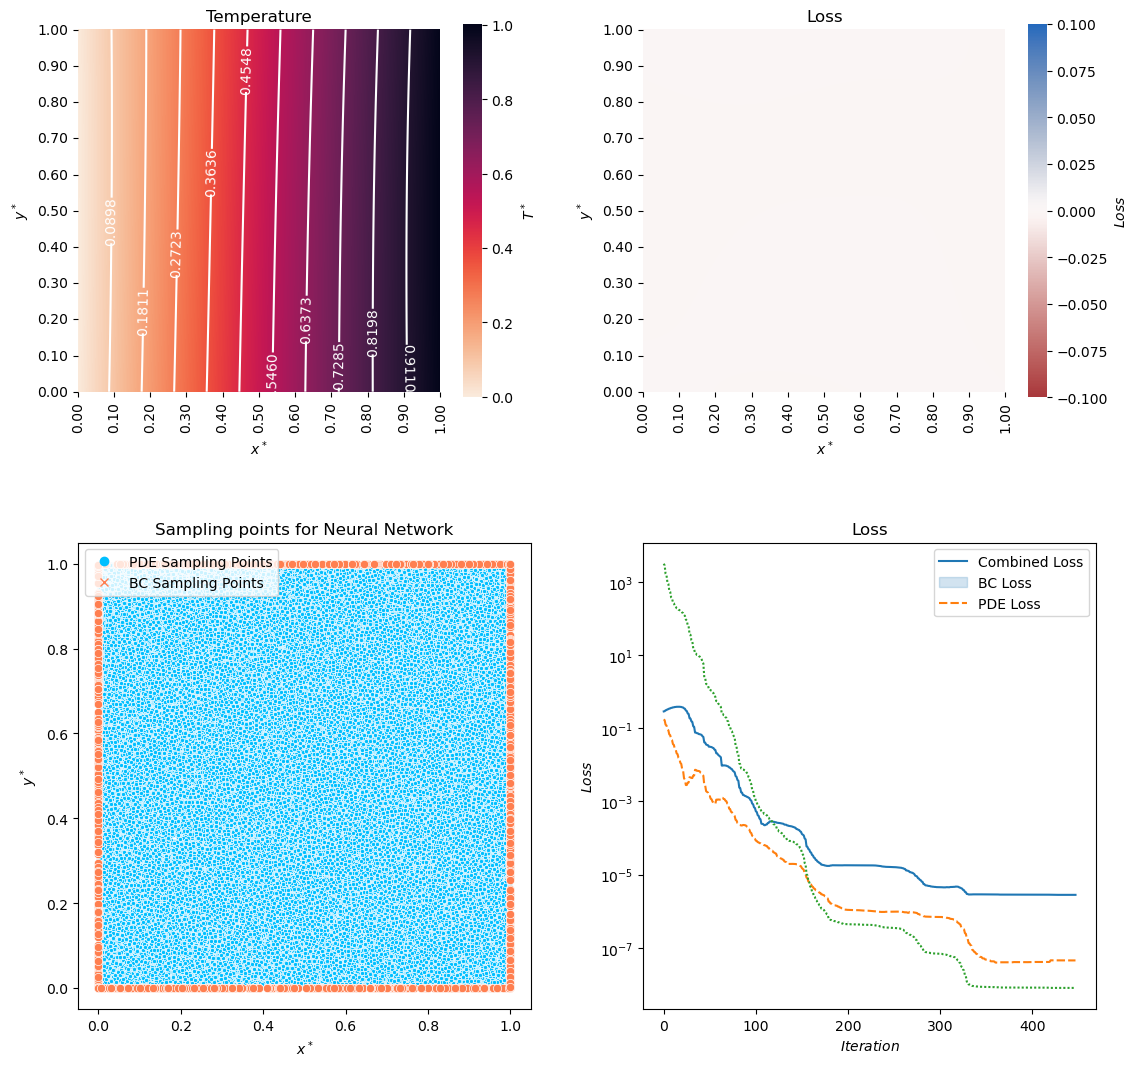

In [9]:
simple_case.plot2()

## 2. Square With Hole

##### Hypotheses:
1. Stationary 2D problem
2. Geometry: simple square of side 1 with circular hole of radius $R = 0.1$ defined by perimeter $\Gamma$
3. No internal heat generation or dissipation

##### Boundary Conditions:
1. Dirichlet:  $\begin{cases}
    T^*(x = 0, y) = 0\\
    T^*(x = 1, y) = 0\\
    T^*(x, y = 0) = 0\\
    T^*(x, y = 1) = 0\\
    T^*(x, y) = 0.5 & , & if (x,y) & \in \Gamma \\
  \end{cases}$

##### Loss function:
The loss function will be calculated as:

$$ Loss_{total} = \frac{N_f}{N_u} Loss_{BC}+ Loss_{PDE}

In [10]:
wHole_case = Viz_Case('wHole', squareHasHole = True, hasInternalHeat = False)

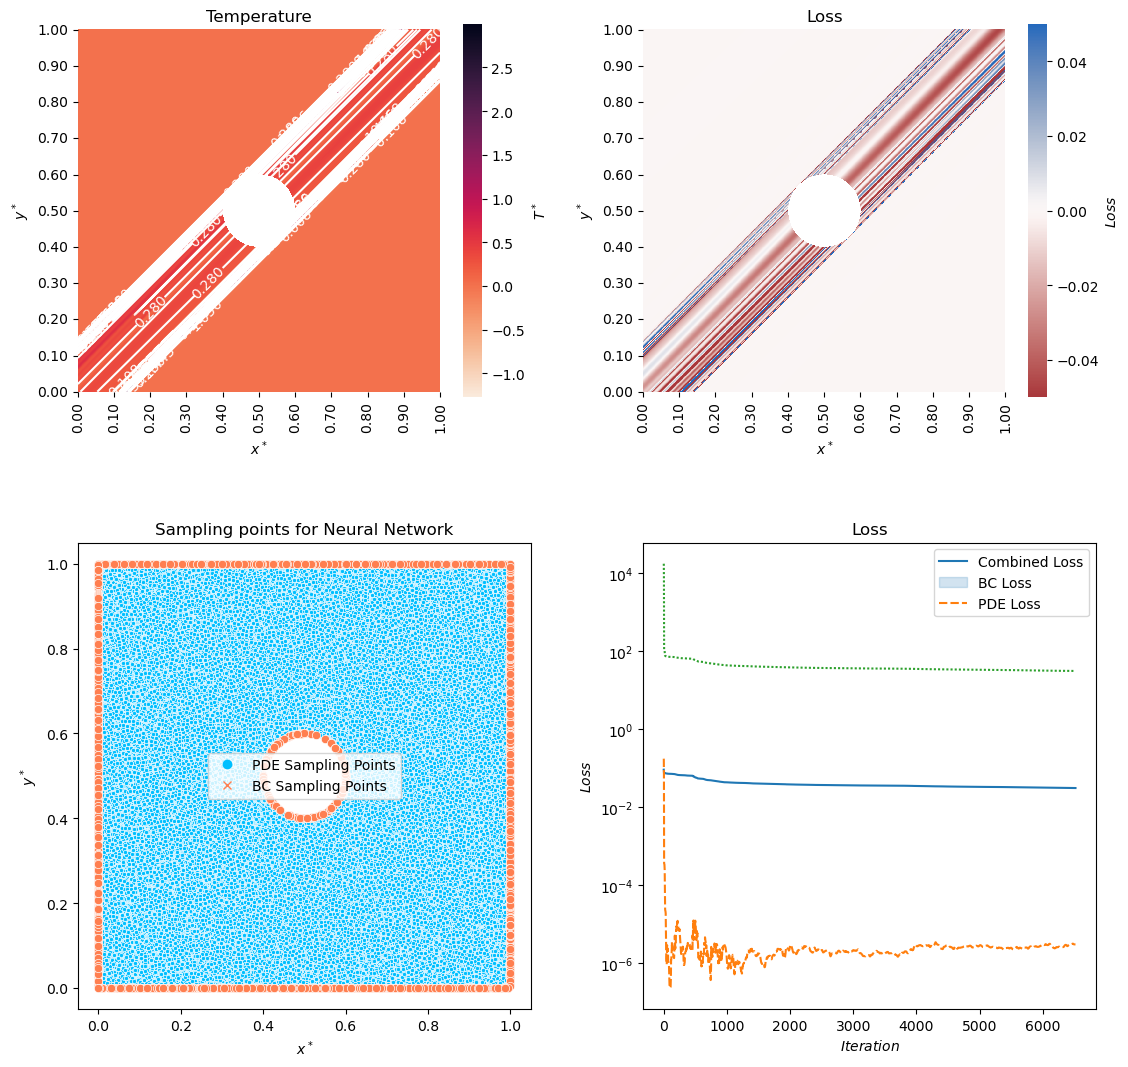

In [11]:
wHole_case.plot2()

## 3. Dirichlet

##### Hypotheses:
1. Stationary 2D problem
2. Geometry: simple square of side 1
3. No internal heat generation or dissipation

##### Boundary Conditions:
1. Dirichlet:  $\begin{cases}
    T^*(x = 0, y) = 0\\
    T^*(x = 1, y) = 1\\
    T^*(x, y = 0) = 0.3\\
    T^*(x, y = 1) = 0.5\\
  \end{cases}$

##### Loss function:
The loss function will be calculated as:

$$ Loss_{total} = \frac{N_f}{N_u} Loss_{BC}+ Loss_{PDE}

#### 1.1. Setup and calculation

In [12]:
dirichlet_case = Viz_Case('dirichlet', squareHasHole = False, hasInternalHeat = False)

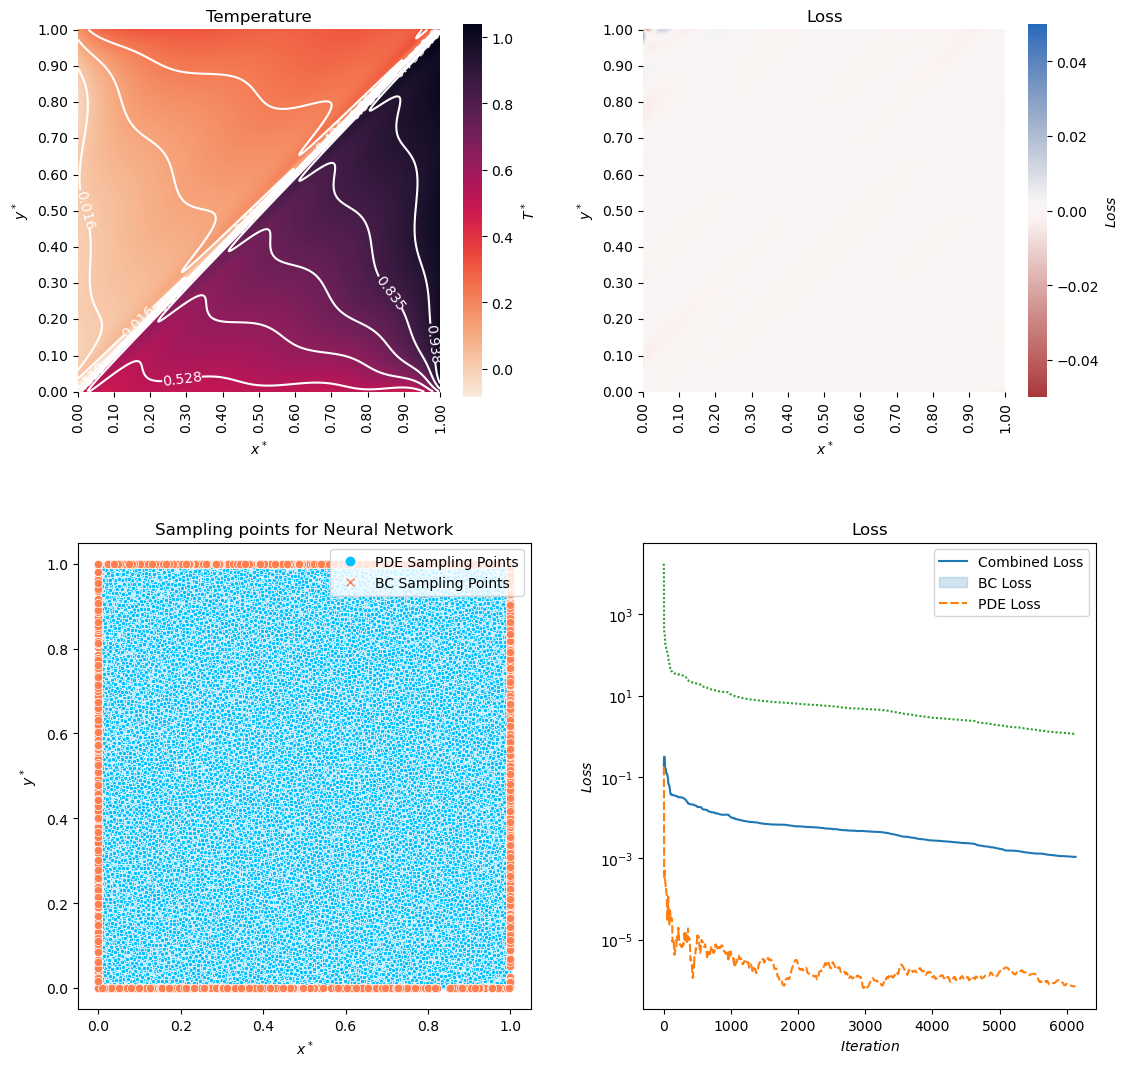

In [13]:
dirichlet_case.plot2()